In [60]:
import sys 
sys.path.append('../fsp')
import stochCalc
import numpy as np
import matplotlib.pyplot as plt

$dR(t) = (\alpha - \beta R(t)) dt + \sigma \sqrt{R(t)} dW(t)$

with $\beta = 1$, $\alpha = 0.10 \beta$, $r = 0.05$, $\sigma = 0.5$.

2A: 

Using the derivation from Q4:

$d log R = (\frac{1}{R} \tilde \alpha(t,R(t)) + \frac{1}{2} \frac{-1 }{R^2} \tilde \sigma(t, R(t))^2)dt + \frac{1}{R} \tilde \sigma(t, R(t)) dW(t)$

where $\tilde \alpha(t,R(t)) = (\alpha - \beta R(t))$ and $ \tilde \sigma(t, R(t)) = \sigma \sqrt{R(t)} $

$d log R = (\frac{1}{R} (\alpha - \beta R(t)) + \frac{1}{2} \frac{-1 }{R^2} (\sigma \sqrt{R(t)})^2)dt + \frac{1}{R} (\sigma \sqrt{R(t)}) dW(t)$

So where $X = log R$, $R = e^{X}$: 

$$ dX = (e^{-X} (\alpha - \beta e^X) + \frac{1}{2} -e^{2X} (\sigma e^{0.5 X})^2)dt + e^{-R} ( \sigma e^{0.5 X}) dW(t) $$


The number of Bad Path's Generated  6


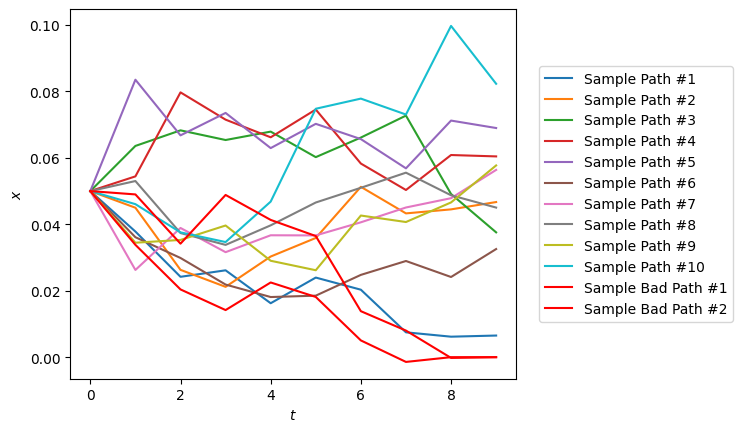

In [61]:
beta = 1
alpha = 0.10 * beta
sigma = 0.5
r = 0.05

def Beta(x : float) -> float:
    return alpha - (x * beta)

def Gamma(x : float) -> float:
    return sigma * np.sqrt(x)
fig, ax = plt.subplots()

cir = stochCalc.SDE(X0=r, lambda_t=0.01, N=10, Beta=Beta, Gamma=Gamma)
paths = cir.getValidPaths(M=1000, greaterThanZero=False)
path_summary = []

path_1 = []
path_2 = []
path_3 = []
path_4 = []
path_5 = []
path_6 = []
path_7 = []
path_8 = []
path_9 = []


for i, pather in enumerate(paths):
    path_1.append(pather[1])
    path_2.append(pather[2])
    path_3.append(pather[3])
    path_4.append(pather[4])
    path_5.append(pather[5])
    path_6.append(pather[6])
    path_7.append(pather[7])
    path_8.append(pather[8])
    path_9.append(pather[9])
    
    if i < 10:
        
        ax.plot(pather, label="Sample Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")

print("The number of Bad Path's Generated ", cir.badPathCounter)

for i, path in enumerate(cir.badPathsSample):
    if i < 2:
        ax.plot(path, c="r", label="Sample Bad Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")
        ax.legend()
    

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))



In [62]:
paths_10 = [path_1, path_2, path_3, path_4, path_5, path_6,
            path_6, path_7, path_8, path_9]
stats_straight_mean = []
stats_straight_std = []
for i, index in enumerate(paths_10):
    print("The sample mean/std at time n=",str(i+1),  " is mean=",str(np.mean(index)), " and std=",np.std(index, ddof=1))
    stats_straight_mean.append(np.mean(index))
    stats_straight_std.append(np.std(index, ddof=1))

The sample mean/std at time n= 1  is mean= 0.05097862879232247  and std= 0.01125798261892917
The sample mean/std at time n= 2  is mean= 0.05170062983710046  and std= 0.015657580315614376
The sample mean/std at time n= 3  is mean= 0.05284381898667592  and std= 0.019548858462263244
The sample mean/std at time n= 4  is mean= 0.05359628857935087  and std= 0.022463721965802454
The sample mean/std at time n= 5  is mean= 0.053903431954783844  and std= 0.025106777704050648
The sample mean/std at time n= 6  is mean= 0.05491031700191637  and std= 0.02763057524454206
The sample mean/std at time n= 7  is mean= 0.05491031700191637  and std= 0.02763057524454206
The sample mean/std at time n= 8  is mean= 0.05551215736440613  and std= 0.03028551571383106
The sample mean/std at time n= 9  is mean= 0.05560293489189399  and std= 0.032862355997428
The sample mean/std at time n= 10  is mean= 0.05576418999501265  and std= 0.03457139092686393


The number of Bad Path's Generated  730


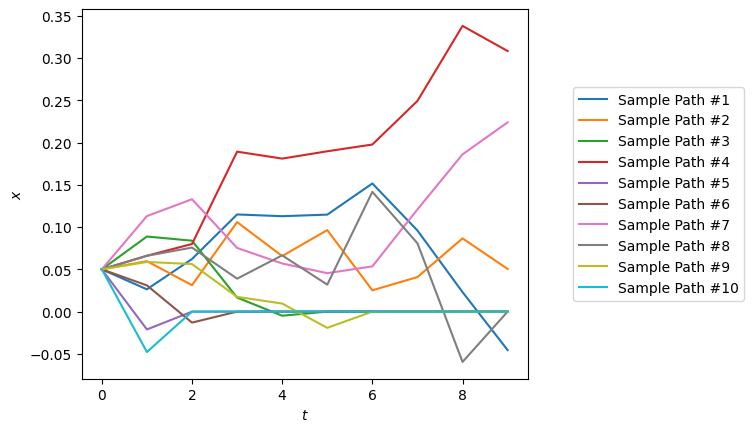

In [63]:
beta = 1
alpha = 0.10 * beta
sigma = 0.5
r = 0.05

def Beta_log(x : float) -> float:
    return np.exp(-x) * (alpha - beta * np.exp(x)) + 0.5 - np.exp(2*x) * sigma**2 * np.exp(x)
    # return (1/np.log(x)) * (alpha - (np.log(x) * beta)) + (1/np.log(x)**2) * (1/2) * (sigma * np.log(x/2))**2
    # return  (1/x * (alpha - beta * x) + 0.5 * (-1 / x**2) * sigma**2 * x)
def Gamma_log(x : float) -> float:
    return np.exp(-x) * sigma * np.exp(0.5*x)
    # return 1/x * sigma
fig, ax = plt.subplots()

cir = stochCalc.SDE(X0=r, lambda_t=0.01, N=10, Beta=Beta_log, Gamma=Gamma_log)
paths = cir.getValidPaths(M=1000, greaterThanZero=False, stopBelowZero=True)
path_summary = []

path_1 = []
path_2 = []
path_3 = []
path_4 = []
path_5 = []
path_6 = []
path_7 = []
path_8 = []
path_9 = []


for i, pather in enumerate(paths):
    path_1.append(pather[1])
    path_2.append(pather[2])
    path_3.append(pather[3])
    path_4.append(pather[4])
    path_5.append(pather[5])
    path_6.append(pather[6])
    path_7.append(pather[7])
    path_8.append(pather[8])
    path_9.append(pather[9])
    
    if i < 10:
        
        ax.plot(pather, label="Sample Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")

print("The number of Bad Path's Generated ", cir.badPathCounter)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

In [64]:
paths_10 = [path_1, path_2, path_3, path_4, path_5, path_6,
            path_6, path_7, path_8, path_9]
stats_log_mean = []
stats_log_std = []

for i, index in enumerate(paths_10):
    print("The sample mean/std at time n=",str(i+1),  " is mean=",str(np.mean(index)), " and std=",np.std(index, ddof=1))
    stats_log_mean.append(np.mean(index))
    stats_log_std.append(np.std(index, ddof=1))

The sample mean/std at time n= 1  is mean= 0.04083416019041144  and std= 0.0475878722756168
The sample mean/std at time n= 2  is mean= 0.040885172021697905  and std= 0.057172134658090214
The sample mean/std at time n= 3  is mean= 0.04134543259218984  and std= 0.06316828732077354
The sample mean/std at time n= 4  is mean= 0.04175231378040469  and std= 0.06707949174502639
The sample mean/std at time n= 5  is mean= 0.04209117299228812  and std= 0.07095358007161133
The sample mean/std at time n= 6  is mean= 0.040806093419117645  and std= 0.07269364080506098
The sample mean/std at time n= 7  is mean= 0.040806093419117645  and std= 0.07269364080506098
The sample mean/std at time n= 8  is mean= 0.03909446404587409  and std= 0.07295660961250419
The sample mean/std at time n= 9  is mean= 0.036638492711440276  and std= 0.07245836927464107
The sample mean/std at time n= 10  is mean= 0.03386177451379288  and std= 0.0705371519067648


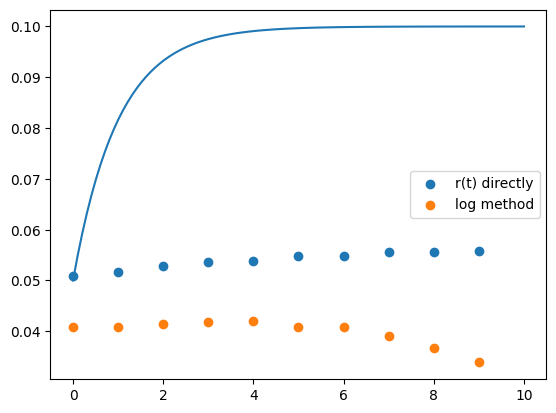

In [65]:
#graph this line
def rt_mean(x):
    return np.exp(-beta * x)*r + (alpha/beta) * (1-np.exp(-beta * x))
def rt_var(x):
    return ((sigma**2) / beta) * r * (np.exp(-beta * x) - np.exp(-2 * beta * x)) + ((alpha * sigma**2)/2 * beta**2) * (1-2*np.exp(-2*beta*x) - np.exp(-2*beta*x))

x_vals = np.linspace(0,10,100)

plt.plot(x_vals, rt_mean(x_vals))
plt.scatter(range(0,10), stats_straight_mean, label="r(t) directly")
plt.scatter(range(0,10), stats_log_mean, label="log method")
plt.legend()

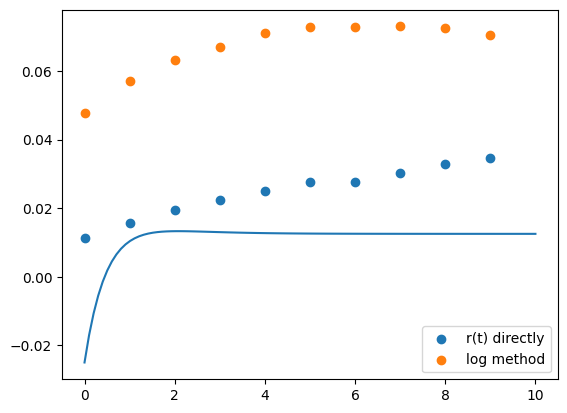

In [66]:
plt.plot(x_vals, rt_var(x_vals))
plt.scatter(range(0,10), stats_straight_std, label="r(t) directly")
plt.scatter(range(0,10), stats_log_std, label="log method")
plt.legend()